In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [80]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [81]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
print(min_thresold)
print(max_thresold)

1366.184
50959.36200000098


In [82]:
len(df)

13200

In [83]:
out=(df['price_per_sqft']>max_thresold) | (df['price_per_sqft']<min_thresold)
out

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199    False
Name: price_per_sqft, Length: 13200, dtype: bool

In [84]:
len(out)

13200

In [85]:
import seaborn as sns

<Axes: >

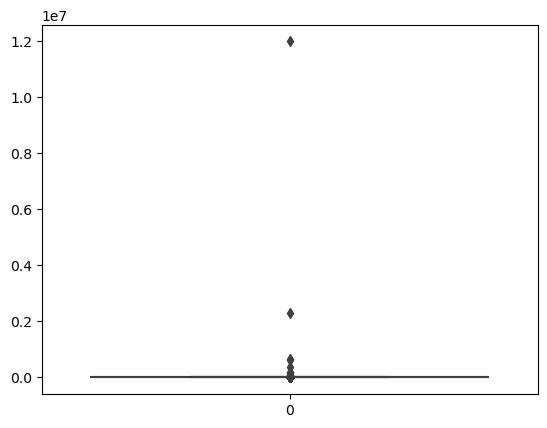

In [86]:
sns.boxplot(data=df.price_per_sqft)

In [87]:
df=df[~out]

In [88]:
len(df)

13172

In [89]:
ul=df.price_per_sqft.mean() + 4*df.price_per_sqft.std()
ul

23227.73653589429

In [90]:
ll=df.price_per_sqft.mean() - 4*df.price_per_sqft.std()
ll

-9900.429065502549

In [91]:
df[(df.price_per_sqft>ul) | (df.price_per_sqft<ll)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


(array([6.37796984e-05, 1.97044231e-04, 7.87866863e-05, 2.50529880e-05,
        1.58441545e-05, 1.09141730e-05, 6.69733343e-06, 4.65092599e-06,
        1.95338892e-06, 1.02320372e-06, 1.08521606e-06, 6.51129639e-07,
        3.10061733e-07, 2.79055559e-07, 9.30185198e-08, 3.10061733e-08,
        0.00000000e+00, 6.20123465e-08, 3.10061733e-08, 1.24024693e-07]),
 array([ 1379. ,  3827.5,  6276. ,  8724.5, 11173. , 13621.5, 16070. ,
        18518.5, 20967. , 23415.5, 25864. , 28312.5, 30761. , 33209.5,
        35658. , 38106.5, 40555. , 43003.5, 45452. , 47900.5, 50349. ]),
 <BarContainer object of 20 artists>)

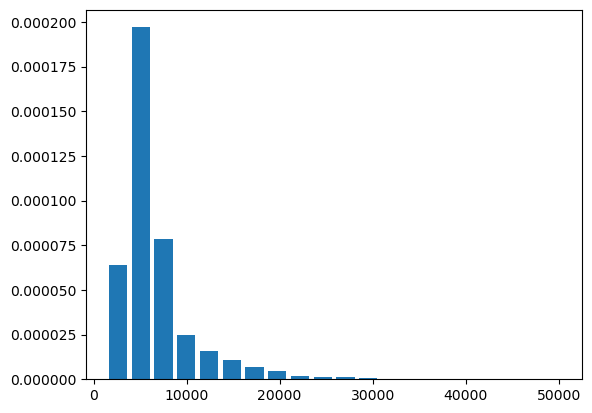

In [92]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8, density=True)


In [93]:
df1=df[(df.price_per_sqft<ul) & (df.price_per_sqft>ll)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


(array([4.56330497e-06, 9.78653403e-05, 2.05489133e-04, 2.09841824e-04,
        1.35495055e-04, 8.23501035e-05, 4.25440432e-05, 2.74500345e-05,
        2.04295653e-05, 1.79021964e-05, 1.48833947e-05, 1.17241835e-05,
        1.07413178e-05, 8.21394894e-06, 7.72251610e-06, 5.82698942e-06,
        3.15921113e-06, 5.75678473e-06, 2.03593606e-06, 1.96573137e-06]),
 array([ 1379.  ,  2470.75,  3562.5 ,  4654.25,  5746.  ,  6837.75,
         7929.5 ,  9021.25, 10113.  , 11204.75, 12296.5 , 13388.25,
        14480.  , 15571.75, 16663.5 , 17755.25, 18847.  , 19938.75,
        21030.5 , 22122.25, 23214.  ]),
 <BarContainer object of 20 artists>)

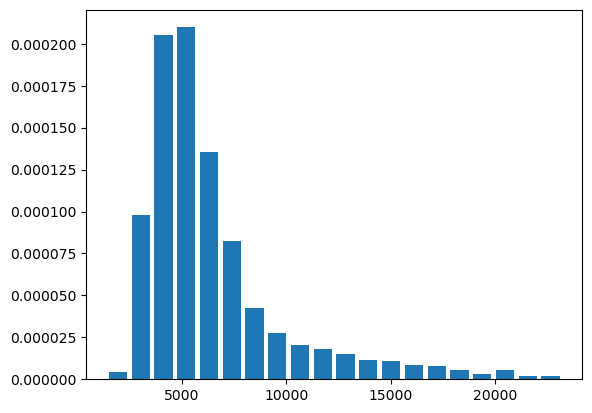

In [94]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8, density=True)


In [95]:
df['zscore']=(df.price_per_sqft - df.price_per_sqft.mean())/df.price_per_sqft.std()
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [96]:
df[(df.zscore<-4) | (df.zscore>4)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [97]:
df2=df[(df.zscore>-4) & (df.zscore<4)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967
